In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import re


# Loading and data preprocessing 🛠️

In [2]:
file_path = 'dataset.csv'

data = pd.read_csv(file_path,
            sep=',',
            quotechar='"',
            escapechar='\\',
            engine='python',
            encoding='utf-8',
            on_bad_lines='warn',  # Can be 'skip', 'warn', or a callable
 )

In [3]:
data.loc[30:35]

,platform,account_id,id,created_time,text_original,text_additional,likes_count,shares_count,comments_count,views_count
30,Instagram,62605500679,C_1IWi_NQaL,2024-09-12 20:16:14.000000 +00:00,"𝘘𝑢𝘢𝑛𝘥𝑜 𝑝𝘳𝑜𝘷𝑖 𝑑𝘰𝑙𝘰𝑟𝘦 𝘦 𝘴𝑡𝘳𝑒𝘴𝑠 𝑛𝘦𝑙𝘭𝑎 𝑡𝘶𝑎 𝑣𝘪𝑡𝘢, 𝑠...",NaN,92.0,NaN,35.0,NaN
31,Instagram,58769017625,C-1tz1JCBuy,2024-08-19 05:12:40.000000 +00:00,Ho fondato un gruppo “Parola del Signore” e as...,None,NaN,NaN,NaN,NaN
32,Leggi la descrizione per saperne di più+,None,None,None,None,None,NaN,NaN,NaN,NaN
33,Argomenti da discutere nel gruppo,None,None,None,None,None,NaN,NaN,NaN,NaN
34,1-Perdono,None,None,None,None,None,NaN,NaN,NaN,NaN
35,2. Ama il prossimo,None,None,None,None,None,NaN,NaN,NaN,NaN


In [4]:
data.value_counts('platform')

platform
YouTube                              2500
TikTok                               2500
Instagram                            2500
Facebook                             2500
#preghiere                             26
                                     ... 
 #Parma #Toscana #Veneto #venezia       1
#Chiesa                                 1
#preghiamo🙏                             1
#preghiamopervoi                        1
#preghiamoconisanti                     1
Name: count, Length: 79, dtype: int64

In [5]:
platforms = ["Facebook", "Instagram", "YouTube", "TikTok"]

pattern = re.compile(r'^(?:' + '|'.join(platforms) + r')', re.IGNORECASE)

In [6]:
def aggregate_rows(filepath, platforms, pattern):
    aggregated_rows = []
    current_row = ""

    with open(filepath, 'r', encoding='utf-8') as file:
        for line_number, line in enumerate(file, start=1):
            line = line.rstrip('\n')

            if pattern.match(line):
                if current_row:
                    aggregated_rows.append(current_row)
                current_row = line
            elif line_number > 1:
                current_row += ' ' + line
            else:
                current_row = line
        if current_row:
            aggregated_rows.append(current_row)

    return aggregated_rows

In [7]:
aggregated_rows = aggregate_rows(file_path, platforms, pattern)
cleaned_csv_content = '\n'.join(aggregated_rows)

In [8]:
cleaned_csv_file = io.StringIO(cleaned_csv_content)

df = pd.read_csv(
    cleaned_csv_file,
    sep=',',
    quotechar='"',
    escapechar='\\',
    engine='python',
    encoding='utf-8',
    on_bad_lines='warn',
)

In [9]:
df.iloc[25:35]

,platform,account_id,id,created_time,text_original,text_additional,likes_count,shares_count,comments_count,views_count
25,Instagram,60554087008,C-12Jqstpfh,2024-08-19 06:24:50.000000 +00:00,𝑁𝑒𝑙 𝑚𝑖𝑜 𝑝𝑟𝑜𝑓𝑖𝑙𝑜 𝑐‘𝑒̀ 𝑢𝑛 𝑔𝑟𝑢𝑝𝑝𝑜 𝑑𝑖 𝑑𝑖𝑠𝑐𝑢𝑠𝑠𝑖𝑜𝑛𝑒 ...,NaN,NaN,NaN,NaN,NaN
26,Instagram,59141296785,C-12MNxCj4v,2024-08-19 06:26:55.000000 +00:00,Avvertimento! Dio ha un messaggio importante d...,NaN,60.0,NaN,12.0,NaN
27,Instagram,62605500679,C15LWKBMxX9,2024-01-09 20:45:19.000000 +00:00,NaN,NaN,307.0,NaN,45.0,NaN
28,Instagram,62605500679,C17zOmWN4ZS,2024-01-10 21:12:18.000000 +00:00,NaN,NaN,114.0,NaN,12.0,NaN
29,Instagram,60554087008,C_1EWe8tfya,2024-09-12 19:41:04.000000 +00:00,"𝘘𝑢𝘢𝑛𝘥𝑜 𝑝𝘳𝑜𝘷𝑖 𝑑𝘰𝑙𝘰𝑟𝘦 𝘦 𝘴𝑡𝘳𝑒𝘴𝑠 𝑛𝘦𝑙𝘭𝑎 𝑡𝘶𝑎 𝑣𝘪𝑡𝘢, 𝑠...",NaN,834.0,NaN,169.0,NaN
30,Instagram,62605500679,C_1IWi_NQaL,2024-09-12 20:16:14.000000 +00:00,"𝘘𝑢𝘢𝑛𝘥𝑜 𝑝𝘳𝑜𝘷𝑖 𝑑𝘰𝑙𝘰𝑟𝘦 𝘦 𝘴𝑡𝘳𝑒𝘴𝑠 𝑛𝘦𝑙𝘭𝑎 𝑡𝘶𝑎 𝑣𝘪𝑡𝘢, 𝑠...",NaN,92.0,NaN,35.0,NaN
31,Instagram,58769017625,C-1tz1JCBuy,2024-08-19 05:12:40.000000 +00:00,Ho fondato un gruppo “Parola del Signore” e as...,NaN,1884.0,NaN,599.0,NaN
32,Instagram,59141296785,C-1uzyvCThG,2024-08-19 05:21:45.000000 +00:00,Smetti di scorrere e accetta questa benedizion...,NaN,556.0,NaN,155.0,NaN
33,Instagram,62605500679,C-1viQWNzMH,2024-08-19 05:27:10.000000 +00:00,"𝐒𝐞𝐠𝐮𝐢𝐜𝐢 𝐬𝐮 👤@preghiamo_dio 𝐂𝐚𝐫𝐢 𝐚𝐦𝐢𝐜𝐢, 𝐚𝐛𝐛𝐢𝐚𝐦𝐨...",NaN,152.0,NaN,58.0,NaN
34,Instagram,58741537308,C-1vp2BiYuC,2024-08-19 05:28:20.000000 +00:00,𝑺𝒆𝒈𝒖𝒊𝒄𝒊 𝒔𝒖 👤@itmariaceleste 𝑽𝒐𝒓𝒓𝒆𝒎𝒐 𝒊𝒏𝒗𝒊𝒕𝒂𝒓𝒕𝒊 ...,NaN,28.0,NaN,4.0,NaN


In [10]:
df[~df['views_count'].isna()]

,platform,account_id,id,created_time,text_original,text_additional,likes_count,shares_count,comments_count,views_count
2500,TikTok,7317060523728045062,7318912899127217414,2024-01-01 00:00:05.000000 +00:00,#PoderDaOração #Fé #Acreditar #ImpactoPosit...,NaN,799.0,48.0,320.0,6979.0
2501,TikTok,7317060523728045062,7319114568901332229,2024-01-01 13:02:41.000000 +00:00,#nossasenhoraaparecida #nossamãe #rainha #fé #...,NaN,409.0,72.0,20.0,4634.0
2502,TikTok,7317060523728045062,7319194312892353798,2024-01-01 18:12:08.000000 +00:00,#porta #anjo #boasnoticias #agosto,NaN,163.0,18.0,29.0,1718.0
2503,TikTok,7317060523728045062,7319235326721920261,2024-01-01 20:51:20.000000 +00:00,#NossaSenhora #RogaPorNós #Amém #Deus #Saú...,NaN,1948.0,74.0,994.0,14200.0
2504,TikTok,7317060523728045062,7319485817968217349,2024-01-02 13:03:21.000000 +00:00,🙏🙏🙏 #Deus #preocupacoes #Maria #Senhor #J...,NaN,2950.0,570.0,650.0,32800.0
...,...,...,...,...,...,...,...,...,...,...
9995,YouTube,UCXZUJg9kVm180MmCfQ4O4Fg,2ZrdyqdjST4,2024-10-10 15:16:59.000000 +00:00,"💞💞Будь ласка, не йдіть, не даруючи їм трохи лю...",NaN,2165.0,NaN,89.0,18613.0
9996,YouTube,UCXZUJg9kVm180MmCfQ4O4Fg,rzcLR-bjtrM,2024-09-30 03:30:33.000000 +00:00,"100% прочитають його, але лише 1% відповість: ...",NaN,53.0,NaN,8.0,1007.0
9997,YouTube,UCXZUJg9kVm180MmCfQ4O4Fg,jBIvuk6sr2I,2024-09-29 15:45:01.000000 +00:00,"Я дякую тим, хто привітав.Тільки ті, хто любит...",NaN,1271.0,NaN,28.0,22564.0
9998,YouTube,UCXZUJg9kVm180MmCfQ4O4Fg,qBVRIlPta04,2024-09-29 09:30:27.000000 +00:00,Нехай Бог благословить її і пошле теплі побажа...,NaN,302.0,NaN,7.0,3697.0


In [11]:
df[~df['shares_count'].isna()]

,platform,account_id,id,created_time,text_original,text_additional,likes_count,shares_count,comments_count,views_count
2500,TikTok,7317060523728045062,7318912899127217414,2024-01-01 00:00:05.000000 +00:00,#PoderDaOração #Fé #Acreditar #ImpactoPosit...,NaN,799.0,48.0,320.0,6979.0
2501,TikTok,7317060523728045062,7319114568901332229,2024-01-01 13:02:41.000000 +00:00,#nossasenhoraaparecida #nossamãe #rainha #fé #...,NaN,409.0,72.0,20.0,4634.0
2502,TikTok,7317060523728045062,7319194312892353798,2024-01-01 18:12:08.000000 +00:00,#porta #anjo #boasnoticias #agosto,NaN,163.0,18.0,29.0,1718.0
2503,TikTok,7317060523728045062,7319235326721920261,2024-01-01 20:51:20.000000 +00:00,#NossaSenhora #RogaPorNós #Amém #Deus #Saú...,NaN,1948.0,74.0,994.0,14200.0
2504,TikTok,7317060523728045062,7319485817968217349,2024-01-02 13:03:21.000000 +00:00,🙏🙏🙏 #Deus #preocupacoes #Maria #Senhor #J...,NaN,2950.0,570.0,650.0,32800.0
...,...,...,...,...,...,...,...,...,...,...
7495,Facebook,100090334794493,361277163560107,2024-03-26 05:20:41.000000 +00:00,NaN,NaN,50.0,68.0,126.0,NaN
7496,Facebook,100090334794493,361264406894716,2024-03-26 04:51:20.000000 +00:00,NaN,NaN,2001.0,1078.0,2266.0,NaN
7497,Facebook,100090334794493,360686530285837,2024-03-25 06:57:18.000000 +00:00,NaN,Instagram,699.0,46.0,737.0,NaN
7498,Facebook,100090334794493,360643896956767,2024-03-25 05:10:39.000000 +00:00,"💝până pe 17 aprilie. În această zi, vin vești ...",NaN,264.0,207.0,414.0,NaN


In [12]:
df.head(20)

,platform,account_id,id,created_time,text_original,text_additional,likes_count,shares_count,comments_count,views_count
0,Instagram,59141296785,C_00PPctR-o,2024-09-12 17:20:36.000000 +00:00,NaN,NaN,222.0,NaN,34.0,NaN
1,Instagram,60554087008,C_00W8KttVv,2024-09-12 17:21:27.000000 +00:00,C’è un gruppo sulla parola di Dio sulla mia ho...,NaN,391.0,NaN,37.0,NaN
2,Instagram,62605500679,C_026U_t3We,2024-09-12 17:43:38.000000 +00:00,𝐒𝐮𝐥 𝐦𝐢𝐨 𝐩𝐫𝐨𝐟𝐢𝐥𝐨 𝐜‘𝐞̀ 𝐮𝐧 𝐠𝐫𝐮𝐩𝐩𝐨 𝐝𝐢 𝐬𝐭𝐮𝐝𝐢𝐨 𝐬𝐮𝐥𝐥𝐚...,NaN,9.0,NaN,3.0,NaN
3,Instagram,58741537308,C_05B3hCYQn,2024-09-12 18:02:08.000000 +00:00,#Monza #Padova #Lecce #Latina #paroladelsignor...,NaN,78.0,NaN,15.0,NaN
4,Instagram,58741537308,C_0BfOLiqRS,2024-09-12 09:57:22.000000 +00:00,#Monza #Padova #Lecce #Latina #paroladelsignor...,NaN,129.0,NaN,16.0,NaN
5,Instagram,60554087008,C-0bWHPCJS2,2024-08-18 17:11:50.000000 +00:00,𝑺𝙪𝒍 𝒎𝙞𝒐 𝒑𝙧𝒐𝙛𝒊𝙡𝒐 𝒄‘𝒆̀ 𝒖𝙣 𝙜𝒓𝙪𝒑𝙥𝒐 𝒅𝙞 𝙨𝒕𝙪𝒅𝙞𝒐 𝒔𝙪𝒍𝙡𝒂...,NaN,225.0,NaN,41.0,NaN
6,Instagram,61867718379,C_0hjXWysdP,2024-09-12 14:37:07.000000 +00:00,"Завтра може бути занадто пізно, тому, будь лас...",NaN,84.0,NaN,43.0,NaN
7,Instagram,58769017625,C-0HUY8iqNc,2024-08-18 14:16:22.000000 +00:00,#signore,NaN,1123.0,NaN,80.0,NaN
8,Instagram,59141296785,C-0IPrsic_l,2024-08-18 14:24:28.000000 +00:00,#signore,NaN,353.0,NaN,45.0,NaN
9,Instagram,61344079846,C_0KxedyBAe,2024-09-12 11:17:57.000000 +00:00,你以为的幸运 其实都是耶稣的保守 人生的每一步都不是偶然 哪有人无缘无故爱你 哪有人无缘无...,NaN,1088.0,NaN,276.0,NaN


In [13]:
df.value_counts('platform')

platform
Facebook     2500
Instagram    2500
TikTok       2500
YouTube      2500
Name: count, dtype: int64

## Save the cleaned dataset to a new CSV file 📁

In [49]:
new_df = df.copy()

In [50]:
new_df.to_csv('new_dataset.csv')

In [51]:
df = pd.read_csv('new_dataset.csv')
df.sample(20)

,Unnamed: 0.1,Unnamed: 0,platform,account_id,id,created_time,text_original,text_additional,likes_count,shares_count,comments_count,views_count,hour,day_of_week,text_length,text_length_category
9362,9362,9362,YouTube,UCnCTdYt9SicG9-yrlf-0GbQ,JJJiEGIORBE,2024-06-15 06:58:18+00:00,"ГосподьДає сили, коли її нема.Дає надію, Коли ...",NaN,51,0,11,334,6,Saturday,100,51-150
5499,5499,5499,Facebook,100077723070329,432510619349704,2024-03-17 08:48:50+00:00,#dziękczynienie #Bóg #Jezus #Amen,NaN,103,6,100,813,8,Sunday,33,0-50
6784,6784,6784,Facebook,100063624145137,371182172490603,2024-03-17 18:30:52+00:00,FERMATI E RINGRAZIA DIO PER SCONFIGGERE SATANA...,NaN,57,62,434,904,18,Sunday,109,51-150
8834,8834,8834,YouTube,UC3pF1tXsYI8Xme1oxciBXfw,nFilW1vDHrU,2024-10-08 04:00:30+00:00,"❤️Я дякую тим, хто привітав.❤️#боже #господь #...",NaN,5513,0,237,18863,4,Tuesday,329,301-500
8028,8028,8028,YouTube,UCM64DwKZ7Qg7T0pBqzRaVug,Rhm4osOMhBw,2024-03-28 21:45:01+00:00,#амінь #бог #господь,NaN,298,0,48,3320,21,Thursday,20,0-50
5496,5496,5496,Facebook,100077723070329,404950658899484,2024-03-17 16:09:09+00:00,"Jeśli wierzysz, że modlitwa może wszystko zmie...",NaN,110,156,417,2606,16,Sunday,176,151-300
6731,6731,6731,Facebook,100063624145137,934269595370503,2024-03-25 08:30:08+00:00,"Mamma, molte persone sono morte ieri notte Rin...",NaN,40,0,28,0,8,Monday,124,51-150
1927,1927,1927,Instagram,60554087008,DA5D0McN3mA,2024-10-09 05:24:45+00:00,"Ti passo la benedizione di Santa Rita, la sant...",NaN,3216,0,363,0,5,Wednesday,742,501-1000
2221,2221,2221,Instagram,62605500679,DAJqXxrtMXY,2024-09-20 19:38:06+00:00,#gesù #preghiera #chieseditalia #trentinodasco...,NaN,14,0,2,0,19,Friday,129,51-150
5351,5351,5351,Facebook,100090480782531,394904526868904,2024-05-17 18:02:28+00:00,"Non stai combattendo da solo, Dio è con te. ✍A...",NaN,32,0,46,0,18,Friday,50,51-150


## Check missing data 🕵🏻‍♀️

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10000 non-null  int64  
 1   platform         10000 non-null  object 
 2   account_id       10000 non-null  object 
 3   id               10000 non-null  object 
 4   created_time     10000 non-null  object 
 5   text_original    7613 non-null   object 
 6   text_additional  3 non-null      object 
 7   likes_count      9998 non-null   float64
 8   shares_count     5000 non-null   float64
 9   comments_count   9955 non-null   float64
 10  views_count      5621 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 859.5+ KB


In [18]:
df.describe()

,Unnamed: 0,likes_count,shares_count,comments_count,views_count
count,10000.00000,9998.000000,5000.000000,9955.000000,5.621000e+03
mean,4999.50000,1416.641928,79.232000,299.793872,1.797353e+04
std,2886.89568,5981.971791,979.564848,1257.022415,1.012492e+05
min,0.00000,0.000000,0.000000,0.000000,3.000000e+00
25%,2499.75000,116.250000,3.000000,28.000000,1.539000e+03
50%,4999.50000,356.000000,9.000000,93.000000,3.704000e+03
75%,7499.25000,895.750000,43.000000,261.000000,8.535000e+03
max,9999.00000,188611.000000,47500.000000,80415.000000,3.500000e+06


In [19]:
df.isnull().sum()

Unnamed: 0            0
platform              0
account_id            0
id                    0
created_time          0
text_original      2387
text_additional    9997
likes_count           2
shares_count       5000
comments_count       45
views_count        4379
dtype: int64

# EDA 📊

In [20]:
df['platform'].unique()

array(['Instagram', 'TikTok', 'Facebook', 'YouTube'], dtype=object)

In [21]:
df['account_id'].nunique()

101

In [22]:
df['id'].nunique()

10000

In [23]:
df.fillna({'likes_count': 0, 'shares_count': 0, 'comments_count': 0, 'views_count': 0,}, inplace=True)

In [24]:
df[['likes_count', 'shares_count', 'comments_count', 'views_count']] = df[['likes_count', 'shares_count', 'comments_count', 'views_count']].astype(int)

In [25]:
df['created_time'] = pd.to_datetime(df['created_time'])
df['created_time']

0      2024-09-12 17:20:36+00:00
1      2024-09-12 17:21:27+00:00
2      2024-09-12 17:43:38+00:00
3      2024-09-12 18:02:08+00:00
4      2024-09-12 09:57:22+00:00
                  ...           
9995   2024-10-10 15:16:59+00:00
9996   2024-09-30 03:30:33+00:00
9997   2024-09-29 15:45:01+00:00
9998   2024-09-29 09:30:27+00:00
9999   2024-09-29 03:45:01+00:00
Name: created_time, Length: 10000, dtype: datetime64[ns, UTC]

In [26]:
df.sample(20)

,Unnamed: 0,platform,account_id,id,created_time,text_original,text_additional,likes_count,shares_count,comments_count,views_count
4134,4134,TikTok,7306849648332243969,7382889897784298772,2024-06-21 09:43:33+00:00,"Jeśli presja pracy, trudności życiowe sprawiaj...",NaN,387,4,55,1673
4014,4014,TikTok,7373402237239870496,7380602228328975649,2024-06-15 05:46:37+00:00,NaN,NaN,313,1,55,10800
7588,7588,YouTube,UCnPA1FJ1BsJxwBXWm9JZvLw,uYC4hBKCWRw,2024-09-13 16:23:07+00:00,Ne te stresse pas trop Dieu sait ce à quoi tu ...,NaN,428,0,341,3188
3267,3267,TikTok,7310612150594372641,7364837713067003168,2024-05-03 18:11:55+00:00,"Powtórz tę modlitwę: Panie Jezu, Ty jesteś moj...",NaN,276,4,86,4532
2756,2756,TikTok,7301606688049054752,7336458290873879840,2024-02-17 06:45:35+00:00,#Angelo #Amen #Gesù #Dio #preghiera #attravers...,NaN,837,3,140,3695
7556,7556,YouTube,UCuBiQMuhjcOxIiCFQ9g2dIA,Xql5gZLKvzs,2024-03-30 19:51:38+00:00,"Ne refuse pas,une bonne nouvelle arrive sur to...",NaN,847,0,166,5296
5879,5879,Facebook,61550094695943,122194669448003156,2024-03-13 06:03:17+00:00,NaN,NaN,266,359,705,0
8704,8704,YouTube,UCZDp5opaZqL3_jed23UU--g,Hkkg3U_DcuU,2024-11-16 10:05:24+00:00,"Я хвилююся за нього, чи можете ви приєднатися ...",NaN,3582,0,104,34936
5625,5625,Facebook,100083858914680,381205598018068,2024-03-12 06:01:43+00:00,NaN,NaN,82,76,154,0
8939,8939,YouTube,UCZDp5opaZqL3_jed23UU--g,btk-UmRnphw,2024-07-03 04:55:15+00:00,"Господь вибрав вас сьогодні, тож напишіть Aмін...",NaN,87,0,22,685


In [27]:
df['created_time'] = pd.to_datetime(df['created_time'])
df['created_time']

0      2024-09-12 17:20:36+00:00
1      2024-09-12 17:21:27+00:00
2      2024-09-12 17:43:38+00:00
3      2024-09-12 18:02:08+00:00
4      2024-09-12 09:57:22+00:00
                  ...           
9995   2024-10-10 15:16:59+00:00
9996   2024-09-30 03:30:33+00:00
9997   2024-09-29 15:45:01+00:00
9998   2024-09-29 09:30:27+00:00
9999   2024-09-29 03:45:01+00:00
Name: created_time, Length: 10000, dtype: datetime64[ns, UTC]

In [28]:
custom_colors = ['#ffa600', '#ff7c43', '#f95d6a', '#d45087']

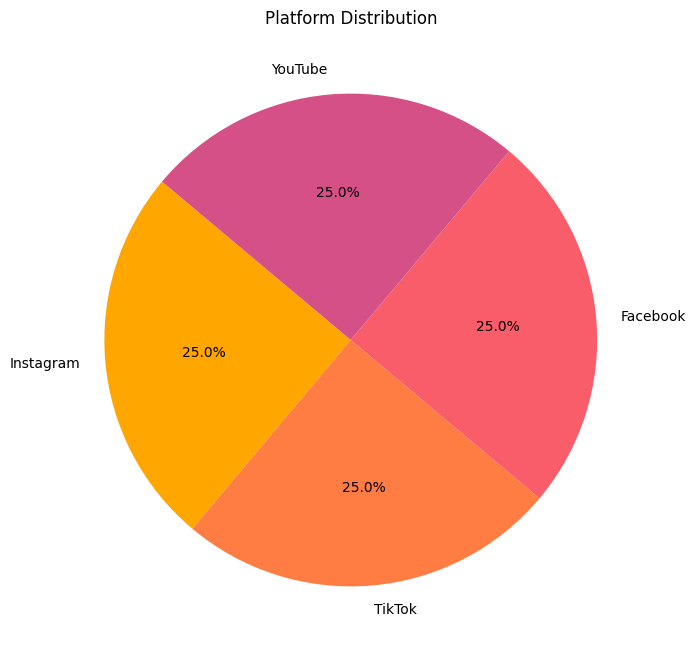

In [52]:
platform_counts = df['platform'].value_counts()
platform_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140, colors=custom_colors)
plt.title('Platform Distribution')
plt.ylabel('')

plt.savefig('platform_distribution.png')

plt.show()

This pie chart shows an equal distribution (25% each) among the platforms YouTube, Facebook, TikTok, and Instagram.


In [30]:
platform_summary = df.groupby('platform')[['likes_count', 'shares_count', 'comments_count', 'views_count']].mean()
platform_summary

,likes_count,shares_count,comments_count,views_count
platform,,,,
Facebook,342.3636,65.276,444.9248,1748.4596
Instagram,1510.9096,0.000,232.6612,0.0000
TikTok,1514.5376,93.188,380.0716,15895.9580
YouTube,2297.6236,0.000,136.1216,22767.2648


<Figure size 1200x600 with 0 Axes>

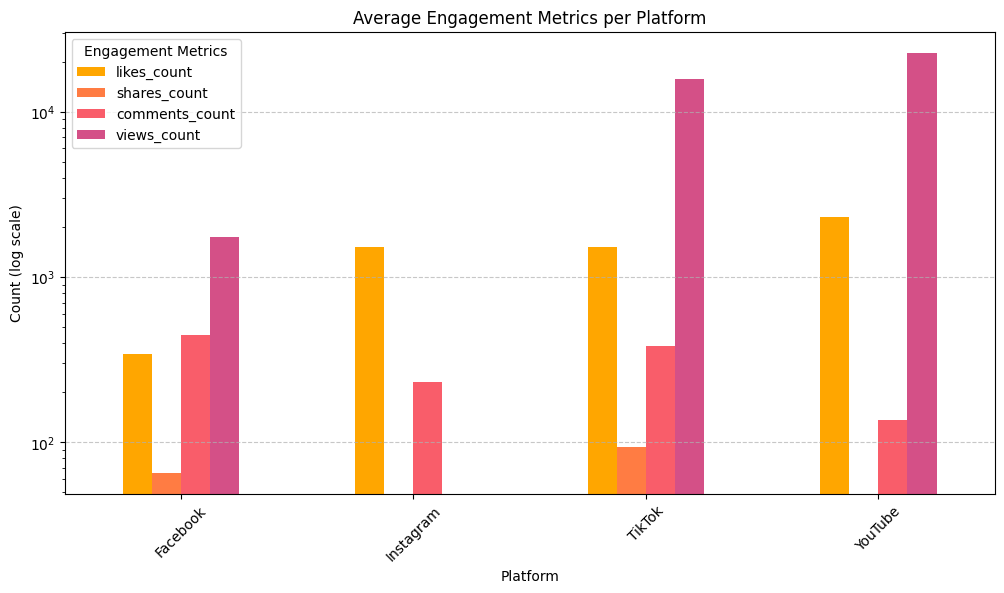

In [53]:


plt.figure(figsize=(12, 6))
platform_summary.plot(kind='bar', figsize=(12, 6), logy=True, color=custom_colors)
plt.title('Average Engagement Metrics per Platform')
plt.ylabel('Count (log scale)')
plt.xlabel('Platform')
plt.legend(title='Engagement Metrics')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('engagement_metrics_per_platform.png', dpi=300, bbox_inches='tight')

plt.show()

**Insight:**
- YouTube has the highest engagement in terms of views, followed by TikTok.
- Instagram shows strong performance in likes, but not as much in shares or comments.
- Facebook lags behind in most metrics compared to other platforms.


In [32]:
df['hour'] = df['created_time'].dt.hour
df['day_of_week'] = df['created_time'].dt.day_name()

In [33]:
hourly_engagement = df.groupby('hour')[['likes_count', 'shares_count', 'comments_count', 'views_count']].mean()

In [34]:
hourly_engagement

,likes_count,shares_count,comments_count,views_count
hour,,,,
0,428.536232,54.043478,441.898551,4842.478261
1,296.058824,34.058824,379.176471,2282.441176
2,346.419355,3.354839,98.548387,2427.000000
3,4232.816860,6.212209,179.686047,45904.915698
4,1519.574766,29.551402,251.448598,13705.191589
5,1368.985915,35.434608,300.377264,5914.455734
6,1341.611111,34.387464,320.122507,6340.713675
7,1849.845283,12.354717,246.732075,12036.573585
8,1306.735211,7.411268,204.912676,10551.788732


<Figure size 1200x600 with 0 Axes>

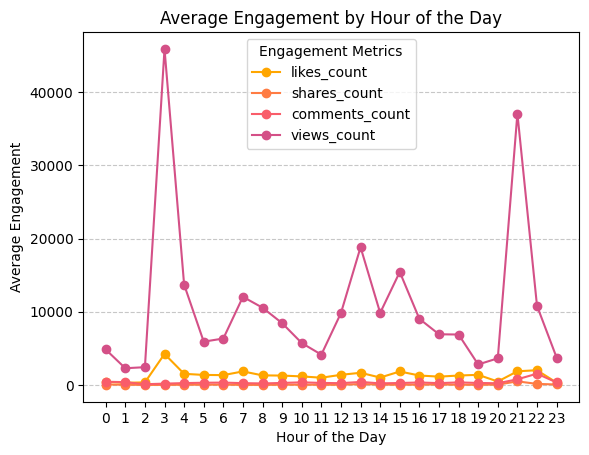

In [54]:
plt.figure(figsize=(12, 6))
hourly_engagement.plot(marker='o', color=custom_colors)
plt.title('Average Engagement by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagement')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.legend(title='Engagement Metrics')

plt.savefig('engagement_by_hour_of_the_day.png', dpi=300, bbox_inches='tight')

plt.show()

**Insight:**
- Engagement peaks significantly around 3 AM and 9 PM.
- There are smaller peaks during midday hours around 12 PM - 3 PM.


In [36]:
daily_engagement = df.groupby('day_of_week')[['likes_count', 'shares_count', 'comments_count', 'views_count']].mean()

In [37]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_engagement = daily_engagement.reindex(days_order)

In [38]:
daily_engagement

,likes_count,shares_count,comments_count,views_count
day_of_week,,,,
Monday,1672.683858,61.561956,329.103818,14504.510382
Tuesday,1145.186047,64.849190,260.975335,7903.786469
Wednesday,1259.215450,21.104890,267.610914,7134.276400
Thursday,1638.479744,41.332623,384.724236,10552.583511
Friday,1380.174442,26.972279,279.429344,9374.323867
Saturday,1181.295683,35.971223,268.124460,8343.285612
Sunday,1624.466096,24.554604,298.284797,12692.903640


<Figure size 1200x600 with 0 Axes>

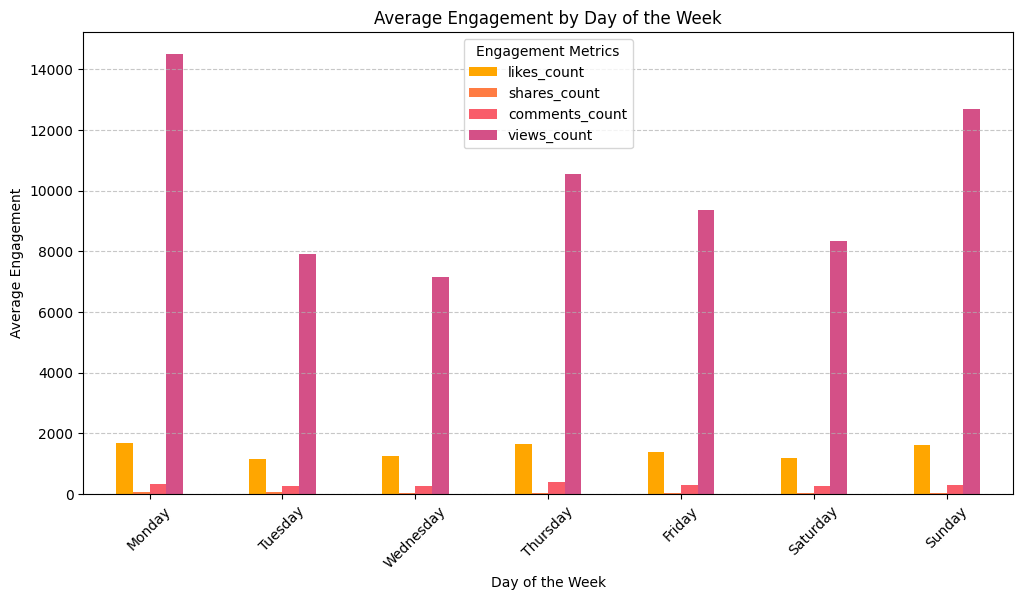

In [55]:
plt.figure(figsize=(12, 6))
daily_engagement.plot(kind='bar', figsize=(12, 6), color=custom_colors)
plt.title('Average Engagement by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Engagement')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title='Engagement Metrics')

plt.savefig('engagement_by_day_of_week.png', dpi=300, bbox_inches='tight')

plt.show()

**Insight:**
- YouTube consistently gets higher views across all days.
- Instagram receives more likes compared to other platforms, especially on weekends.
- Shares tend to peak on Mondays and Thursdays across platforms.
- Facebook has the lowest engagement across all metrics.


In [40]:
df['text_length'] = df['text_original'].fillna('').apply(len)

In [41]:
bins = [0, 50, 150, 300, 500, 1000, df['text_length'].max()]
labels = ['0-50', '51-150', '151-300', '301-500', '501-1000', '1000+']
df['text_length_category'] = pd.cut(df['text_length'], bins=bins, labels=labels, right=False)

In [42]:
length_engagement = df.groupby('text_length_category')[['likes_count', 'shares_count', 'comments_count', 'views_count']].mean()

/var/folders/0f/3q1rn1_d089d85w405_m22bm0000gn/T/ipykernel_7953/3118765097.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_engagement = df.groupby('text_length_category')[['likes_count', 'shares_count', 'comments_count', 'views_count']].mean()


In [43]:
length_engagement

,likes_count,shares_count,comments_count,views_count
text_length_category,,,,
0-50,784.492084,43.430695,320.132149,3041.701777
51-150,1463.565600,44.095200,317.030400,10537.065200
151-300,1146.580842,68.823063,322.110433,11095.427700
301-500,2315.424483,15.502385,230.806041,21015.043985
501-1000,2282.765625,10.829545,291.190341,10029.730114
1000+,1279.197674,9.034884,184.302326,1991.569767


<Figure size 1200x600 with 0 Axes>

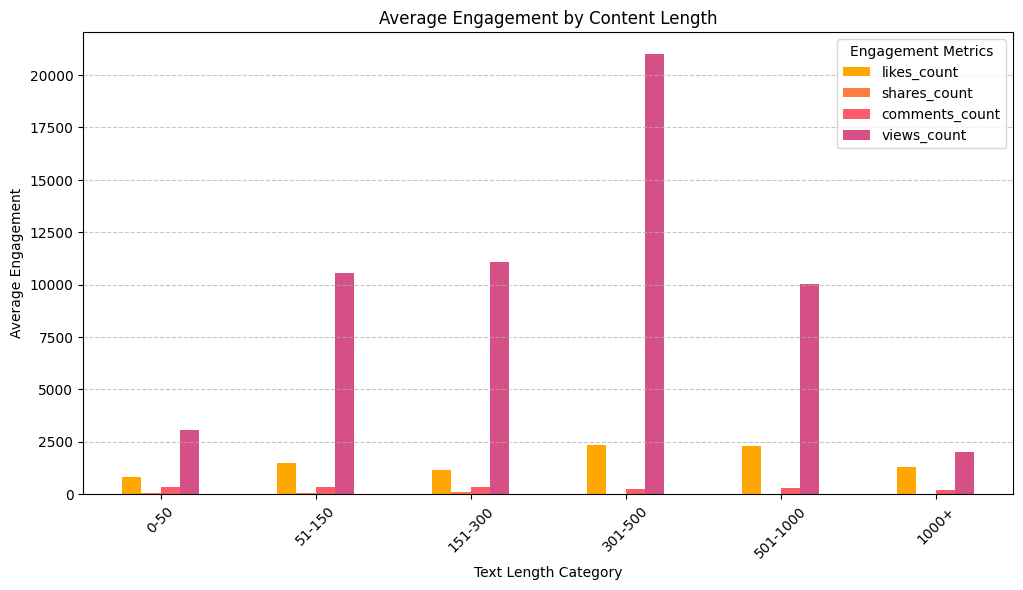

In [56]:
plt.figure(figsize=(12, 6))
length_engagement.plot(kind='bar', figsize=(12, 6), color=custom_colors)
plt.title('Average Engagement by Content Length')
plt.xlabel('Text Length Category')
plt.ylabel('Average Engagement')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title='Engagement Metrics')

plt.savefig('engagement_by_content_length_category.png', dpi=300, bbox_inches='tight')

plt.show()

**Insight:**
- Engagement (views) is highest for content in the range of 301-500 words, followed by 151-300 words.
- Shorter content (0-50 words) receives significantly lower engagement.


In [45]:
platform_day_engagement = df.groupby(['platform', 'day_of_week'])[
    ['likes_count', 'shares_count', 'comments_count', 'views_count']
].mean().reset_index()

In [46]:
platform_day_engagement['day_of_week'] = pd.Categorical(
    platform_day_engagement['day_of_week'],
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True
)

In [47]:
pivot_likes = platform_day_engagement.pivot(index='day_of_week', columns='platform', values='likes_count')
pivot_shares = platform_day_engagement.pivot(index='day_of_week', columns='platform', values='shares_count')
pivot_comments = platform_day_engagement.pivot(index='day_of_week', columns='platform', values='comments_count')
pivot_views = platform_day_engagement.pivot(index='day_of_week', columns='platform', values='views_count')

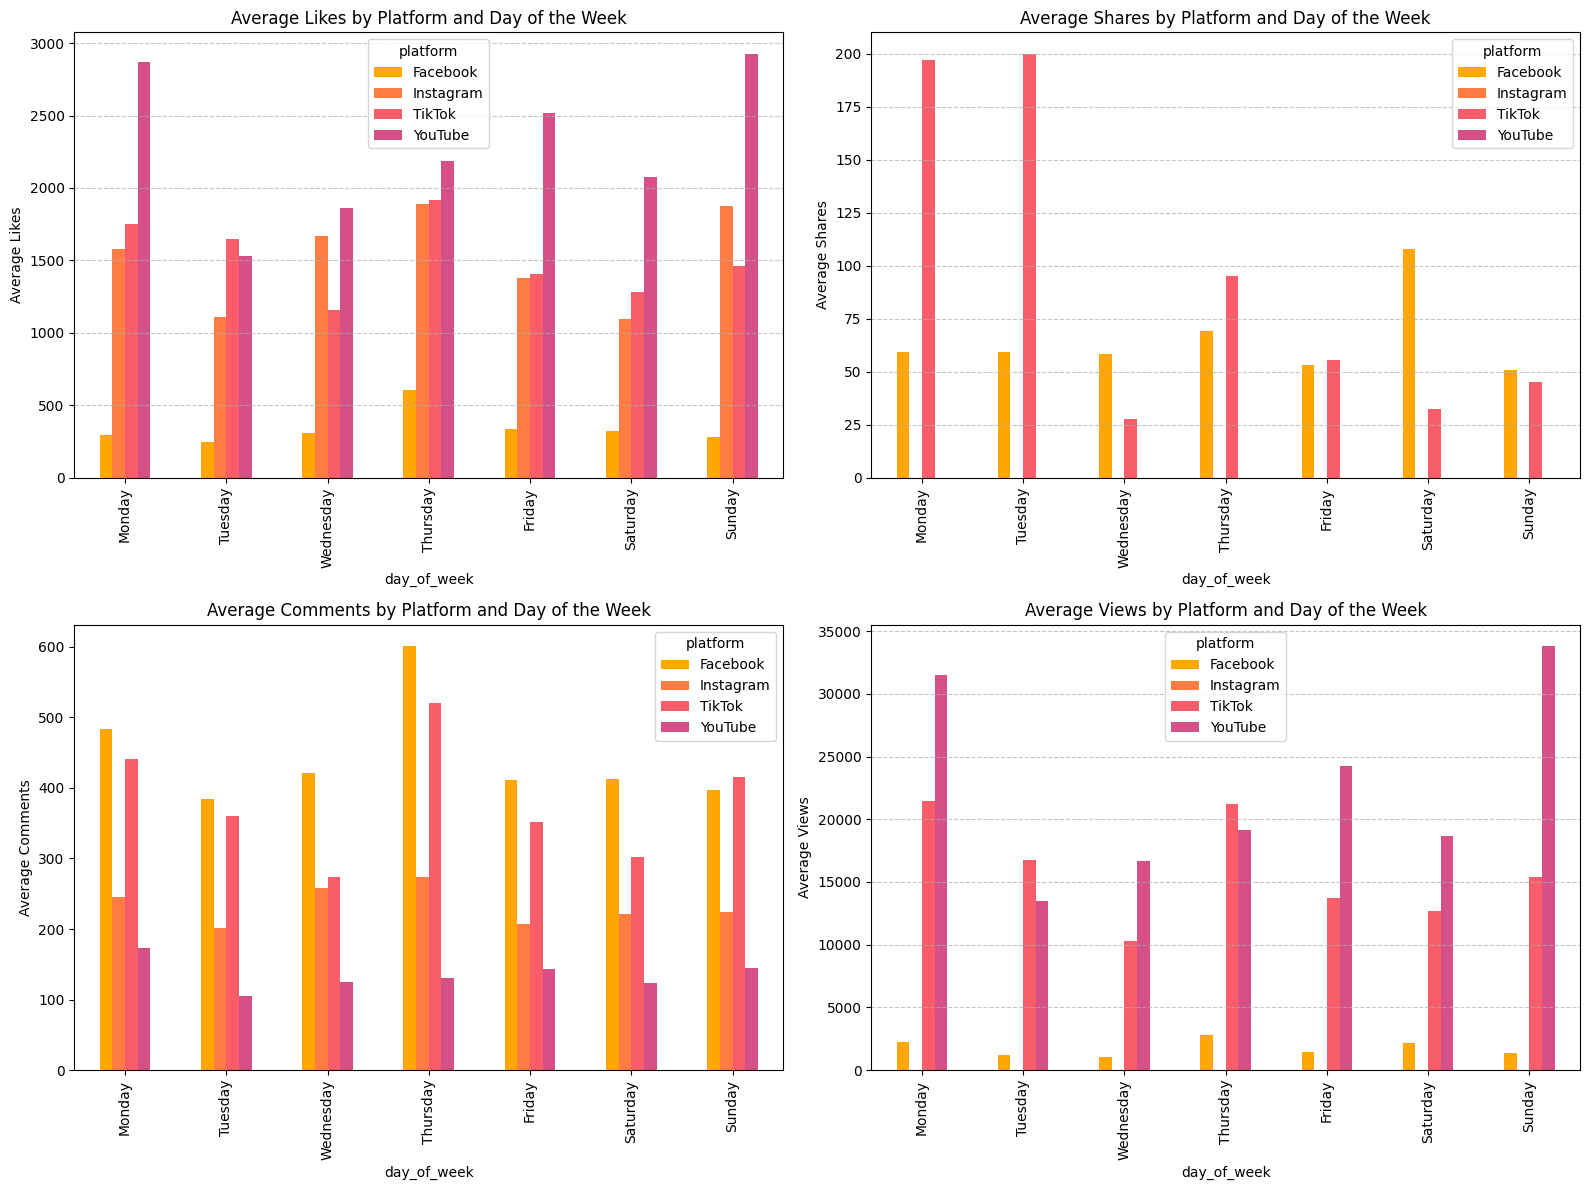

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

pivot_likes.plot(kind='bar', ax=axes[0, 0],  color=custom_colors)
axes[0, 0].set_title('Average Likes by Platform and Day of the Week')
axes[0, 0].set_ylabel('Average Likes')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

pivot_shares.plot(kind='bar', ax=axes[0, 1], color=custom_colors)
axes[0, 1].set_title('Average Shares by Platform and Day of the Week')
axes[0, 1].set_ylabel('Average Shares')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

pivot_comments.plot(kind='bar', ax=axes[1, 0], color=custom_colors)
axes[1, 0].set_title('Average Comments by Platform and Day of the Week')
axes[1, 0].set_ylabel('Average Comments')
axes[1, 0].grid(axis='y', linestyle='--', alpha=0)

pivot_views.plot(kind='bar', ax=axes[1, 1], color=custom_colors)
axes[1, 1].set_title('Average Views by Platform and Day of the Week')
axes[1, 1].set_ylabel('Average Views')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('platform_trends.png', dpi=300, bbox_inches='tight')

plt.show()


**Best Days for Engagement:**
- Mondays and Thursdays for shares and views.
- Thursdays and Sundays for likes.
- Thursdays for comments (especially on Facebook).


**Insight:**
- YouTube: Strong in likes, shares, and views—focus on video content, best posted early in the week.
- Instagram: Likes-driven, best for visual content engagement on Sundays and Thursdays.
- Facebook: Comments-driven platform—good for community interactions on Thursdays.
- TikTok: Stable engagement, but needs a strategy to prevent mid-week drop-offs.
